<a align="left" href="https://ultralytics.com/yolov5" target="_blank">
<img width="1024", src="https://user-images.githubusercontent.com/26833433/125273437-35b3fc00-e30d-11eb-9079-46f313325424.png"></a>

- **YOLOv5 의 공식 노트북** 
- GPL-3.0 license 
- https://github.com/ultralytics/yolov5
- https://ultralytics.com



# 1-Setup

Repositary 및 Library 설치 

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-244-g47233e1 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)


Setup complete ✅ (4 CPUs, 25.5 GB RAM, 38.8/166.8 GB disk)


# 2-모델학습

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="1000" src="https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/615627e5824c9c6195abfda9_computer-vision-cycle.png"/></a></p>

<br><br>
- Object Detection을 위해서 YOLOv5 모델을 활용 함 
- 기존에 학습 된(Pretrained) 모델을 가져오고 데이터를 학습 시킴 
- Pretrain 된 YOLOv5s 모델에 COCO128 데이터를 이용해 학습을 진행 함 
- Datasets은 COCO, COCO128,VOC 등 다양하게 있으며 명령어 입력 시 자동으로 다운로드가 됨 
- 학습 결과는 `runs/train/` 에 이미지가 저장 됨 

<br><br>
**학습 방법** 

```
- 학습을 위해선 아래 코드에 `image_size`, `batch_size`, `epochs`, `Datasets`, `pretrained model`만 입력하여 실행시키면 됨 

!python3 train.py --img {image_size} --batch {batch_size} --epochs {epochs} --data {datasets} --weights {pretrained_model} --cache

- 위 코드 실행 시 데이터 다운로드, Pretrained model 다운로드, 학습 모두 자동으로 실행 됨 
```

Datasets 
```
종류
Argoverse, GlobalWheat2020, Objects365, SKU-110K, VOC, VISdRONE, coco, coco128, xView

Datsets 설명
- coco : 일상속 common objects 
- Argoverse : 자율주행 관련 
- GlobalWheat2020 : 농작물 관련 
- Objects365 : 일상 object (참고 : https://www.objects365.org/explore.html)
- SKU-110K : 슈퍼마켓 objects 
- VOC
- VisdRONE : 드론으로 촬영된 이미지, 환경, 물체(자전거,차) 등이 존재 함 
- xView : 항공 사진 

- coco128 데이터셋 추천 : 다른 데이터 셋은 전처리 때문에 오랜 시간이 소요 됨 + 일반적이지 않은 데이터들 도 있음(aka 항공 사진) 

커스텀 데이터 셋 
정해진 데이터 셋을 사용할 수 있지만 커스텀 데이터셋을 사용할 수도 있음 (이는 아래서 추가 설명) 
```

Pretrained model 종류 
```
YOLOv5n, YOLOv5s, YOLOv5m,YOLOv5l,YOLOv5x
------------------------------------>>>>>
정확도가 증가하지만 모델이 커지고 무거워짐

```

In [ ]:
#YOLOV5s를 기반으로 
img_size = 480 
batch_size =16 
num_epochs = 10
datasets = 'coco128.yaml'
weight = 'yolov5s.p


!python3 train.py --img {img_size} --batch {batch_size} --epochs {num_epochs} --data {datasets} --weights {weight} --cache
# !python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt --cache

```
- 학습 된 model 파일은 runs/train/exp/weights 폴더에 best.pt로 저장 됨 
- 해당 디렉토리는 상이할 수 있음 ex : runs/train/exp/weights (exp 숫자가 바뀜)

```

# 3-추론
- 학습시킨 모델을 이용해 추론을 하기 위해서는 detect.py를 사용 함 
- train.py와 마찬가지로 weigths 와 data source를 지정해 주면 추론이 가능 함 
- 이 때 weigths로는 pretrained를 사용할 수도 있고 위에서 학습시킨 weights를 사용할 수 있음 
- 사용 예시 
```
python detect.py --source {data} --weights {weight} --img {img_size}  
```

detect.py는 다양한 데이터 소스로 부터 추론이 가능하며 그 예는 아래와 같음 

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          path/  # directory
                          path/*.jpg  # glob
                          'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

- 학습 단계에서 학습 시킨 모델과 새로운 데이터를 이용해 Object Detection 진행 
- 학습 시킨 모델 파일을 컴퓨터에 저장 받아 Webcam으로 Object detection 진행 


In [ ]:
#content 에 temp 디렉토리를 만들고 이미지를 추가 함 
%cd /content
%mkdir /temp
%cd /content/temp
#데이터 다운로드 
!wget https://thumbs.dreamstime.com/z/people-going-to-work-bike-street-road-cars-odessa-city-ukraine-august-summer-active-activity-adult-bag-beard-bicycle-biking-157317882.jpg 

In [ ]:
# %cd ../
weight_path = '/content/yolov5/runs/train/exp/weights/best.pt' #위에서 학습 시킨 모델 weight 
data_path = '/content/temp' #예측하고자 하는 이미지 디렉토리 
!python3 /content/yolov5/detect.py --weights {weight_path} --img 640 --conf 0.25 --source {data_path}

Objects Detection 진행 한 이미지 출력 

In [ ]:
from glob import glob 
from matplotlib import pyplot as plt 
import cv2
temp_imgs = glob('/content/yolov5/runs/detect/exp4/*.jpg')
for temp in temp_imgs:
  temp_img = cv2.imread(temp)
  temp_img = cv2.cvtColor(temp_img,cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(10,8))
  plt.imshow(temp_img)
  plt.show()

# 4- Custom Data : Mask 데이터
 - 특정 규칙만 맞춰서 데이터를 만들어 주면 다른 데이터 들로 Objects Detection 학습 가능 

- 아래 트리 구조 처럼 train 폴더 안에 images, labels 형태로 폴더를 만들고 이미지와 라벨 파일들을 폴더 내에 저장하면 됨 

- 그 이후의 과정은 위 과정과 모두 동일 함 

 - 데이터셋만 마스크 데이터를 사용하며, 나머지 과정은 모두 동일함 


In [16]:
!tree -L 2 -f

.
├── ./data.yaml
├── ./README.roboflow.txt
├── ./train
│   ├── ./train/images
│   ├── ./train/labels
│   └── ./train/labels.cache
└── ./valid
    ├── ./valid/images
    ├── ./valid/labels
    └── ./valid/labels.cache

6 directories, 4 files


In [ ]:
%cd /content/
%mkdir /content/yolov5_mask
%cd /content/yolov5_mask/

## 4-1 데이터 다운로드

In [ ]:
import yaml

# 학습 데이터 다운로드

!curl -L "https://app.roboflow.com/ds/UDw102Apji?key=9OZpzHulse" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

with open('/content/yolov5_mask/data.yaml', 'r') as f:
  data = yaml.load(f,Loader=yaml.FullLoader)

print(data)
data['names'] = ['mask','no-mask']

data['train'] = '/content/yolov5_mask/train/'
data['val'] = '/content/yolov5_mask/valid/'

with open('/content/yolov5_mask/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)
%cat /content/yolov5_mask/data.yaml

## 4-2 학습 

In [ ]:
#YOLOV5s를 기반으로 
%cd /content/yolov5
img_size = 640 
batch_size =16 
num_epochs = 100
datasets = '/content/yolov5_mask/data.yaml'
weight = 'yolov5s.pt'
!python3 train.py --img {img_size} --batch {batch_size} --epochs {num_epochs} --data {datasets} --weights {weight} --cache

## 4-3 추론 

In [ ]:
# %cd ../
weight_path = '/content/yolov5/runs/train/exp2/weights/best.pt'
data_path = '/content/temp'
!python3 /content/yolov5/detect.py --weights {weight_path} --img 640 --conf 0.25 --source {data_path}

#6- Webcam을 활용

1. 웹캠으로 입력 된 이미지로 바로 Object Detection을 진행할 수 있음 
2. YOLOv5에는 이러한 기능이 내장되어 있어 `--source 0` 로 세팅해서 detect.py를 실행시킬 경우 바로 가능 
3. 하지만 코랩에서는 이것이 불가능하기 때문에 로컬에서 진행해야 함 
4. 코랩에서 모델을 학습시킨 뒤 이를 다운로드 
5. 그 후 로컬에서 아나콘다 프롬프트 실행 

6. 로컬에서 YOLOv5 git을 clone 함 

```
git clone https://github.com/ultralytics/yolov5  # clone
```

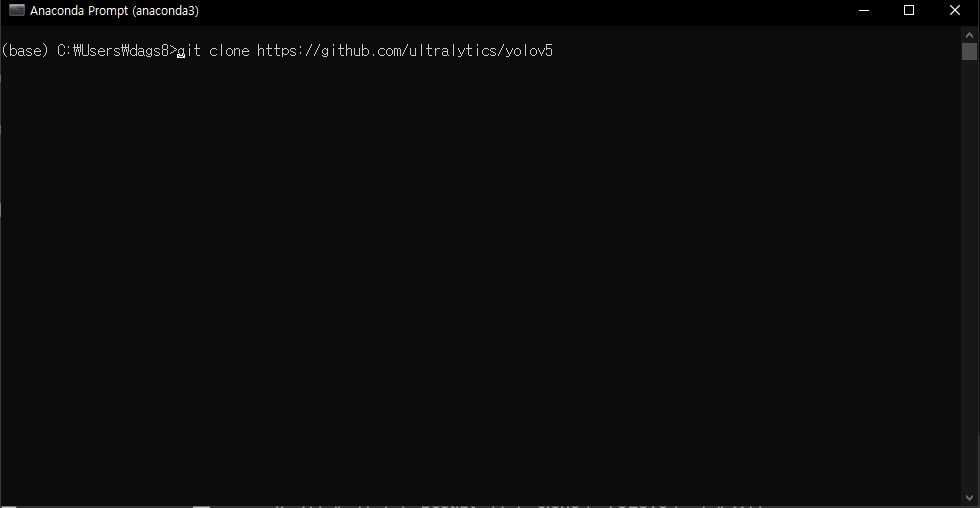

7. 처음에 다운받은 best.pt 파일을 clone 한 YOLOv5 폴더에 넣음 
8. 다시 프롬프트를 키고 cd ./yolov5 를 입력해서 디렉토리 변경 
9. detect.py 파일 실행 

```
python detect.py --source 0 --weights best.pt --conf 0.6
```